LAB 2: Find the diameter of the base and the height of the bottle.

Description:
The images are captured by fixing a camera at the end of the robot arm. The setup is as described in the documentation about the  handEye calibration of Open CV
https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html#ga3207604e4b1a1758aa66acb6ed5aa65d


Step 1:
_______
First do the camera calibration (i.e. find the intrinsic matric and distortion components) using the 3 images of the checkerboard pattern.

Then find the camera to end-effector pose

You can use the calibration functions provided by openCV

Step 2:
______
Use the next three images (Bot_1,2,3.jpg)
to find the world coordinates of a few points of the bottle and the table on which the bottle is placed. You can use the intersection point of the aruco marker, as well as some feature from the text on the top of the bottle cap.

To extract the image coordinates - you can use pixspy.com as in last lab.

Question 1: Describe your approach (with any equations) in a separate markup cell - before the appropriate code cells.

Question 2: Write your code

Question 3: The bottle height and diameter are:


In [ ]:
import numpy as np
#open CV library for image manipulation
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [ ]:
# This package helps to download files from google drive
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#download the image files for calibration of the camera
import gdown
url='https://drive.google.com/uc?id=1Tgl7gbojnjbGVqjh-B8G7tAEIYva8hKo'
#https://drive.google.com/file/d/1Tgl7gbojnjbGVqjh-B8G7tAEIYva8hKo/view?usp=share_link
output = 'Lab2_Cal_1.png'
gdown.download(url, output, quiet=False)
url='https://drive.google.com/uc?id=1kcFdK9wb5-ur5BFdg5Xie1lS9mI_qCur'
#https://drive.google.com/file/d/1kcFdK9wb5-ur5BFdg5Xie1lS9mI_qCur/view?usp=share_link
output = 'Lab2_Cal_2.png'
gdown.download(url, output, quiet=False)
url='https://drive.google.com/uc?id=1JmHSNBIXiWLDFrmT9dFJkC3ZxKEOpf8w'
#https://drive.google.com/file/d/1JmHSNBIXiWLDFrmT9dFJkC3ZxKEOpf8w/view?usp=share_link
output = 'Lab2_Cal_3.png'
gdown.download(url, output, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1Tgl7gbojnjbGVqjh-B8G7tAEIYva8hKo
To: /content/Lab2_Cal_1.png
100%|██████████| 297k/297k [00:00<00:00, 84.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kcFdK9wb5-ur5BFdg5Xie1lS9mI_qCur
To: /content/Lab2_Cal_2.png
100%|██████████| 296k/296k [00:00<00:00, 35.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JmHSNBIXiWLDFrmT9dFJkC3ZxKEOpf8w
To: /content/Lab2_Cal_3.png
100%|██████████| 336k/336k [00:00<00:00, 81.2MB/s]


'Lab2_Cal_3.png'

In [ ]:
#Download the csv file with end effector poses
url='https://drive.google.com/uc?id=18ezIn45u8a3HnfOl9xyrB20MhF-lK03R'
#https://drive.google.com/file/d/18ezIn45u8a3HnfOl9xyrB20MhF-lK03R/view?usp=share_link
output = 'Lab2_ee_pose.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=18ezIn45u8a3HnfOl9xyrB20MhF-lK03R
To: /content/Lab2_ee_pose.csv
100%|██████████| 294/294 [00:00<00:00, 713kB/s]


'Lab2_ee_pose.csv'

In [ ]:
# Read the end effector (ee) pose table from csv file
poseTable = pd.read_csv('Lab2_ee_pose.csv')
print(poseTable)
def get_rotation_matrix(roll, pitch, yaw):
    roll_matrix = np.array([
        [1., 0., 0.],
        [0., np.cos(roll*np.pi/180), -np.sin(roll*np.pi/180)],
        [0., np.sin(roll*np.pi/180), np.cos(roll*np.pi/180)],
    ])
    pitch_matrix = np.array([
        [np.cos(pitch*np.pi/180), 0., np.sin(pitch*np.pi/180)],
        [0., 1., 0.],
        [-np.sin(pitch*np.pi/180), 0, np.cos(pitch*np.pi/180)],
    ])
    yaw_matrix = np.array([
        [np.cos(yaw*np.pi/180), -np.sin(yaw*np.pi/180), 0],
        [np.sin(yaw*np.pi/180), np.cos(yaw*np.pi/180), 0],
        [0., 0., 1.],
    ])
    rv,_ = cv.Rodrigues(yaw_matrix @ pitch_matrix @ roll_matrix)
    rv = rv.reshape(3,1)
    return rv

def get_rotation_matrix1(roll, pitch, yaw):
    roll_matrix = np.array([
        [1., 0., 0.],
        [0., np.cos(roll*np.pi/180), -np.sin(roll*np.pi/180)],
        [0., np.sin(roll*np.pi/180), np.cos(roll*np.pi/180)],
    ])
    pitch_matrix = np.array([
        [np.cos(pitch*np.pi/180), 0., np.sin(pitch*np.pi/180)],
        [0., 1., 0.],
        [-np.sin(pitch*np.pi/180), 0, np.cos(pitch*np.pi/180)],
    ])
    yaw_matrix = np.array([
        [np.cos(yaw*np.pi/180), -np.sin(yaw*np.pi/180), 0],
        [np.sin(yaw*np.pi/180), np.cos(yaw*np.pi/180), 0],
        [0., 0., 1.],
    ])
    return yaw_matrix @ pitch_matrix @ roll_matrix



            image   ee_X   ee_Y   ee_Z  ee_roll  ee_pitch  ee_yaw
0  Lab2_Cal_1.png  0.637  0.201  0.628      180         0     180
1  Lab2_Cal_2.png  0.590  0.124  0.705      169         5     162
2  Lab2_Cal_3.png  0.472  0.043  0.645      148        -4     142
3       Bot_1.png  0.585  0.167  0.637      180         0     180
4       Bot_2.png  0.573  0.111  0.581      168         3     162
5       Bot_3.png  0.487  0.137  0.556      158        15     154


In [ ]:
## Extacting the pose data and storing into an array
poseTable_arr = poseTable.to_numpy()
pose_R = poseTable_arr[:,4:].astype(float)
pose_t = poseTable_arr[:,1:4].astype(float)
print("pose_R\n",pose_R,"\n\npose_t\n",pose_t)

pose_R
 [[180.   0. 180.]
 [169.   5. 162.]
 [148.  -4. 142.]
 [180.   0. 180.]
 [168.   3. 162.]
 [158.  15. 154.]] 

pose_t
 [[0.637 0.201 0.628]
 [0.59  0.124 0.705]
 [0.472 0.043 0.645]
 [0.585 0.167 0.637]
 [0.573 0.111 0.581]
 [0.487 0.137 0.556]]


In [ ]:
# Defining the dimensions of checkerboard
CHECKERBOARD = (8,6)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = []


# Defining the world 3D coordinates for 48 corner points of the checkerboard
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = .02*np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

['Lab2_Cal_1.png', 'Lab2_Cal_2.png', 'Lab2_Cal_3.png']


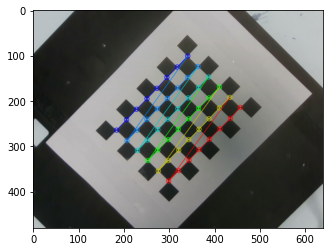

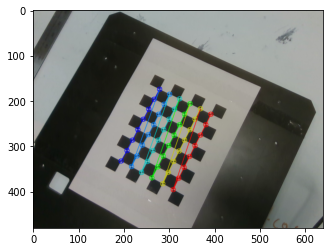

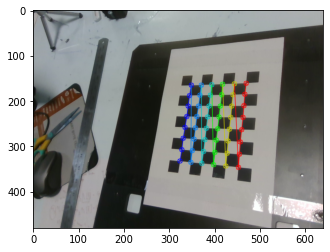

In [ ]:
#load each of the calibration images
# Automatically find out the corner points from each of the image to give 2D Coordinates
# Set up the 3D and
images = glob.glob('Lab2_Cal*.png')
temp=images[0]
images[0]=images[2]
images[1]=images[1]
images[2]=temp


for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray,CHECKERBOARD, None)

    # Patch: Symmetric chessboard won't preserve order of detected corners
    if fname == "Lab2_Cal_3.png":
      gray = cv.rotate(gray,cv.ROTATE_180)
      ret, corners = cv.findChessboardCorners(gray,CHECKERBOARD, None)
      corners[:,0,0] = 640 - corners[:,0,0]
      corners[:,0,1] = 480 - corners[:,0,1]
      gray = cv.rotate(gray,cv.ROTATE_180)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        plt.figure()
        plt.imshow(img)
        #cv.imshow('img', img)
        #cv.waitKey(500)
#cv.destroyAllWindows()
print(images)

In [ ]:
"""
Performing camera calibration by
passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the
detected corners (imgpoints)
"""



h,w = img.shape[:2]

ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)
print("Reprojection Error=",ret)
rvecs[0].T

Camera matrix : 

[[604.66686869   0.         321.01841395]
 [  0.         604.72252118 237.54466239]
 [  0.           0.           1.        ]]
dist : 

[[-6.02111095e-02  2.51234328e+00  3.18345078e-05  2.11987170e-03
  -1.48440578e+01]]
rvecs : 

(array([[ 0.01663784],
       [ 0.02689955],
       [-0.80062472]]), array([[-0.19616556],
       [-0.02473433],
       [-1.09801281]]), array([[-0.57577032],
       [ 0.12846961],
       [-1.44191928]]))
tvecs : 

(array([[-0.08541082],
       [ 0.01664521],
       [ 0.37634273]]), array([[-0.09758061],
       [ 0.0726714 ],
       [ 0.46518526]]), array([[0.00240443],
       [0.07357473],
       [0.4685591 ]]))
Reprojection Error= 0.09361487426526018


array([[ 0.01663784,  0.02689955, -0.80062472]])

In [ ]:
# Now find the camera to end-effector pose
# using cv.calibrateHandEye()
R_gripper2base = ( np.array(get_rotation_matrix(pose_R[0][0],pose_R[0][1],pose_R[0][2])), np.array(get_rotation_matrix(pose_R[1][0],pose_R[1][1],pose_R[1][2])), np.array(get_rotation_matrix(pose_R[2][0],pose_R[2][1],pose_R[2][2])) )
t_gripper2base = (np.array([pose_t[0]]).T, np.array([pose_t[1]]).T,np.array([pose_t[2]]).T)
R_target2cam = rvecs
t_target2cam = tvecs

R_cam2gripper,T_cam2gripper = cv.calibrateHandEye(R_gripper2base, t_gripper2base,R_target2cam, t_target2cam)
R_cam2gripper, _ = cv.Rodrigues(R_cam2gripper)

print("\nR_cam2gripper :\n",R_cam2gripper,"\n\nT_cam2gripper :\n",T_cam2gripper)




R_cam2gripper :
 [[-1.92391503e-03]
 [-4.07218652e-02]
 [-2.31542883e+00]] 

T_cam2gripper :
 [[-0.01247841]
 [ 0.02782962]
 [ 0.04872929]]


In [ ]:
# Download the images of the bottle on the aruco marker

url='https://drive.google.com/uc?id=1_Vy7ife0wxGmvgqBqkYQ2XAQEm-aWmWr'
#https://drive.google.com/file/d/1_Vy7ife0wxGmvgqBqkYQ2XAQEm-aWmWr/view?usp=share_link
output = 'Bot_1.png'
gdown.download(url, output, quiet=False)
url='https://drive.google.com/uc?id=1GXbI0IJVNONG_ek3-g28ZR_DNyMk7FwQ'
#https://drive.google.com/file/d/1GXbI0IJVNONG_ek3-g28ZR_DNyMk7FwQ/view?usp=share_link
output = 'Bot_2.png'
gdown.download(url, output, quiet=False)
url='https://drive.google.com/uc?id=1K3jWaRQUtf3g6hB2MsaW8-zJ6tYlfjYy'
#https://drive.google.com/file/d/1K3jWaRQUtf3g6hB2MsaW8-zJ6tYlfjYy/view?usp=share_link
output = 'Bot_3.png'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1_Vy7ife0wxGmvgqBqkYQ2XAQEm-aWmWr
To: /content/Bot_1.png
100%|██████████| 246k/246k [00:00<00:00, 68.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GXbI0IJVNONG_ek3-g28ZR_DNyMk7FwQ
To: /content/Bot_2.png
100%|██████████| 259k/259k [00:00<00:00, 89.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K3jWaRQUtf3g6hB2MsaW8-zJ6tYlfjYy
To: /content/Bot_3.png
100%|██████████| 270k/270k [00:00<00:00, 90.1MB/s]


'Bot_3.png'

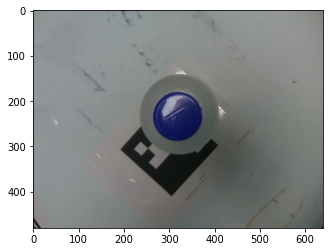

In [ ]:
img_1 = cv.undistort(cv.imread('Bot_1.png',cv.COLOR_BGR2RGB), mtx,dist)
plt.imshow(img_1)

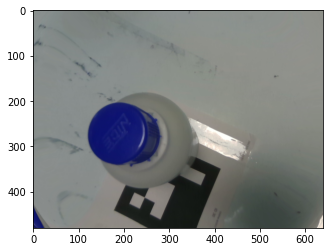

In [ ]:
img_2 = cv.undistort(cv.imread('Bot_2.png',cv.COLOR_BGR2RGB), mtx,dist)
plt.imshow(img_2)

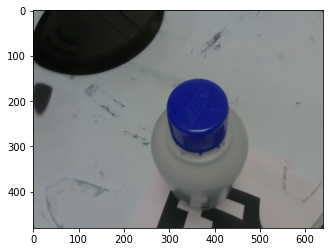

In [ ]:
img_3 = cv.undistort(cv.imread('Bot_3.png',cv.COLOR_BGR2RGB), mtx,dist)
plt.imshow(img_3)


Q1: Write your approach to find the height and the diameter of the base of the bottle.

--Your answer here------






**Approach:**

$Camera\_matrix$ : Assumes same camera matrix for the left and right images with format as below.


\begin{align}\
                M =
                \left[
                   \begin{array}{ccc}
                        f_x & 0 & c_x \\
                        0 & f_y & c_y\\
                        0 & 0 & 1
                    \end{array}
                \right]
\end{align}



\begin{align}
    \left[
        \begin{array}{ccc}
                        u_3 \\
                        v_3\\
                        1
        \end{array}
    \right]
        =
    \left[
        \begin{array}{ccc}
                        f_x & 0 & c_x & 0 \\
                        0 & f_y & c_y & 0\\
                        0 & 0 & 1 & 0
        \end{array}
    \right]
    \left[
        \begin{array}{ccc}
                        x_3 \\
                        y_3\\
                        z_3 \\
                        1
        \end{array}
    \right]
    and
    \left[
        \begin{array}{ccc}
                        u_2 \\
                        v_2\\
                        1
        \end{array}
    \right]
        =
    \left[
        \begin{array}{ccc}
                        f_x & 0 & c_x & 0 \\
                        0 & f_y & c_y & 0\\
                        0 & 0 & 1 & 0
        \end{array}
    \right]
    \left[
        \begin{array}{ccc}
                        x_2 \\
                        y_2\\
                        z_2 \\
                        1
        \end{array}
    \right]  
\end{align}



Also from Rvector and Tvector we can compute:



\begin{align}
    \left[
        \begin{array}{ccc}
                        x_3 \\
                        y_3\\
                        z_3 \\
                        1
        \end{array}
    \right]
        =
    \left[
        \begin{array}{ccc}
                        r_{11} & r_{12} & r_{13} & t_x \\
                        r_{21} & r_{22} & r_{23} & t_y \\
                        r_{31} & r_{32} & r_{33} & t_z \\
                        0      & 0      & 0      & 1
        \end{array}
    \right]
    \left[
        \begin{array}{ccc}
                        x_2 \\
                        y_2\\
                        z_2 \\
                        1
        \end{array}
    \right]
\end{align}
or,



\begin{align}
    \left[
        \begin{array}{ccc}
                        u_3 \\
                        v_3\\
                        1
        \end{array}
    \right]
        =
    \left[
        \begin{array}{ccc}
                        f_x & 0 & c_x & 0 \\
                        0 & f_y & c_y & 0\\
                        0 & 0 & 1 & 0
        \end{array}
    \right]
    \left[
        \begin{array}{ccc}
                        r_{11} & r_{12} & r_{13} & t_x \\
                        r_{21} & r_{22} & r_{23} & t_y \\
                        r_{31} & r_{32} & r_{33} & t_z \\
                        0      & 0      & 0      & 1
        \end{array}
    \right]
    \left[
        \begin{array}{ccc}
                        x_2 \\
                        y_2\\
                        z_2 \\
                        1
        \end{array}
    \right]
\end{align}\
\
\begin{align}
\overline{X_3} = P *  \overline{X_w}
\end{align}\
\
We know everthing except the world coordinates so rearranging the matrix equation we get,\
\
\begin{align}
    \left[
        \begin{array}{ccc}
u_2m_{31}-m_{11} & u_2m_{32}-m_{12} & u_2m_{33}-m_{13}  \\
v_2m_{31}-m_{21} & v_2m_{32}-m_{22} & v_2m_{33}-m_{23}\\
u_3p_{31}-p_{11} & u_3p_{32}-p_{12} & u_3p_{33}-p_{13} \\
v_3p_{31}-p_{21} & v_3p_{32}-p_{22} & v_3p_{33}-p_{23}
        \end{array}
    \right]
    \left[
        \begin{array}{ccc}
                        x_r \\
                        y_r\\
                        z_r \\
        \end{array}
    \right]
    \left[
        \begin{array}{ccc}
                        m_{14}-m_{34} \\
                        m_{24}-m_{34} \\
                        p_{14}-p_{34} \\
                        p_{24}-p_{34}
        \end{array}
    \right]
\end{align}
\
\begin{align}
CX = B
\end{align}
\begin{align}
X_2 = (A^TA)^{-1}A^TB
\end{align}
Solving the above equation we can get the 3D coordinates wrt to second image. Now we can get back to the world coordinates

In [ ]:
# Q2: Your code here

#calculating the transformation matrix of image 2 wrt image 3

R2=get_rotation_matrix1(poseTable.iloc[4]['ee_roll'],poseTable.iloc[4]['ee_pitch'],poseTable.iloc[4]['ee_yaw'])
R3=get_rotation_matrix1(poseTable.iloc[5]['ee_roll'],poseTable.iloc[5]['ee_pitch'],poseTable.iloc[5]['ee_yaw'])
T2=poseTable.iloc[4]['ee_X'],poseTable.iloc[4]['ee_Y'],poseTable.iloc[4]['ee_Z']
T3=poseTable.iloc[5]['ee_X'],poseTable.iloc[5]['ee_Y'],poseTable.iloc[5]['ee_Z']
a=np.array([0 ,0 ,0 ,1])
b=(np.c_[R2,T2])
c=(np.c_[R3,T3])
a=a.reshape(1,4)
Ree_world2=np.r_[b,a]
Ree_world3=np.r_[c,a]
R_cam2gripper,_=cv.Rodrigues(R_cam2gripper)
Rc_ee=np.r_[np.c_[R_cam2gripper,T_cam2gripper],a]
Rcamera_world2=Ree_world2@Rc_ee
Rcamera_world3=Ree_world3@Rc_ee
R=np.linalg.inv(Rcamera_world3)@Rcamera_world2 #Transformation matrix of image 2 wrt image


In [ ]:
Mint=np.c_[mtx,[0,0,0]]
P=Mint@R

def dmatrix(u2,v2,u3,v3):

   A=[[(u2*Mint[2][0]-Mint[0][0]),(u2*Mint[2][1]-Mint[0][1]),(u2*Mint[2][2]-Mint[0][2])],
      [(v2*Mint[2][0]-Mint[1][0]),(v2*Mint[2][1]-Mint[1][1]),(v2*Mint[2][2]-Mint[1][2])],
      [(u3*P[2][0]-P[0][0]),(u3*P[2][1]-P[0][1]),(u3*P[2][2]-P[0][2])],
      [(v3*P[2][0]-P[1][0]),(v3*P[2][1]-P[1][1]),(v3*P[2][2]-P[1][2])]]

   return A



b=[(Mint[0][3]-Mint[2][3]),(Mint[1][3]-Mint[2][3]),(P[0][3]-P[2][3]),(P[1][3]-P[2][3])]

#Calculation of height by taking the corresondance between second and third images.

u2_1=204
v2_1=271
u3_1=384
v3_1=202
A1=dmatrix(u2_1,v2_1,u3_1,v3_1)
A1=np.array(A1)
X1=(np.linalg.inv((A1.T)@A1))@(A1.T)@b
x1=np.array([X1[0],X1[1],X1[2],1])
x1=Rcamera_world2@x1



u2_2=413
v2_2=348
u3_2=500
v3_2=418
A2=dmatrix(u2_2,v2_2,u3_2,v3_2)
A2=np.array(A2)
X2=(np.linalg.inv((A2.T)@A2))@(A2.T)@b
x2=np.array([X2[0],X2[1],X2[2],1])
x2=Rcamera_world2@x2



Height=abs((x1-x2)[2])*100

print("Height of the bottle is:" ,Height,"c.m")


#Calculation of Diameter by taking the corresondance between second and third images.

u2_3=184
v2_3=270
u3_3=358
v3_3=206
A3=dmatrix(u2_3,v2_3,u3_3,v3_3)
A3=np.array(A3)
X3=(np.linalg.inv((A3.T)@A3))@(A3.T)@b
x3=np.array([X3[0],X3[1],X3[2],1])
x3=Rcamera_world2@x3


u2_4=362
v2_4=323
u3_4=440
v3_4=391
A4=dmatrix(u2_4,v2_4,u3_4,v3_4)
A4=np.array(A4)
X4=(np.linalg.inv((A4.T)@A4))@(A4.T)@b
x4=np.array([X4[0],X4[1],X4[2],1])
x4=Rcamera_world2@x4

D=(np.sqrt(((x3[0]-x4[0])**2)+((x3[1]-x4[1])**2)))*200

print("Dameter of the bottle is:" ,D,"c.m")



Height of the bottle is: 20.99581770243322 c.m
Dameter of the bottle is: 6.590025901406681 c.m


Q3: What is the height of the bottle and the diameter of the base of the bottle?

Height of the bottle = 20.99 cm
Diameter of the base of the bottle = 6.59 cm